In [ ]:
import os
from google.colab import drive

path_ai = "Inteligencia_Artificial_2210097/ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Inteligencia_Artificial_2210097/ai-uis-student


La pregunta más relevante identificada como objetivo es: Q23A

Top 10 características más importantes:
    Característica  Importancia
67            Q23E     0.012820
60            Q21A     0.012306
3              Q2A     0.011745
83            Q29A     0.011201
9              Q4A     0.011087
42            Q15A     0.010882
71            Q25A     0.010369
18             Q7A     0.010074
119           Q41A     0.008612
86            Q30A     0.008585


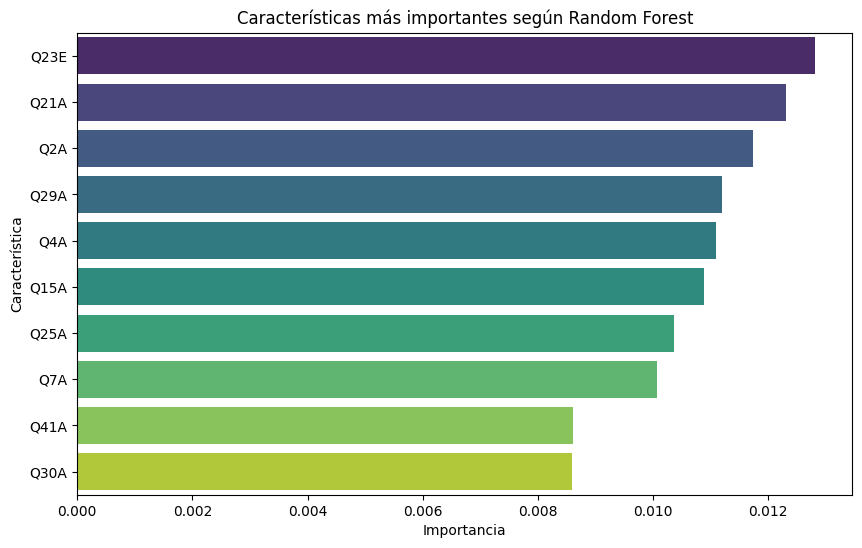


Forma de los datos después de aplicar PCA: (14260, 6)
Varianza explicada por cada componente principal: [0.66592667 0.19460223 0.04988207 0.0166568  0.0159628  0.01405244]


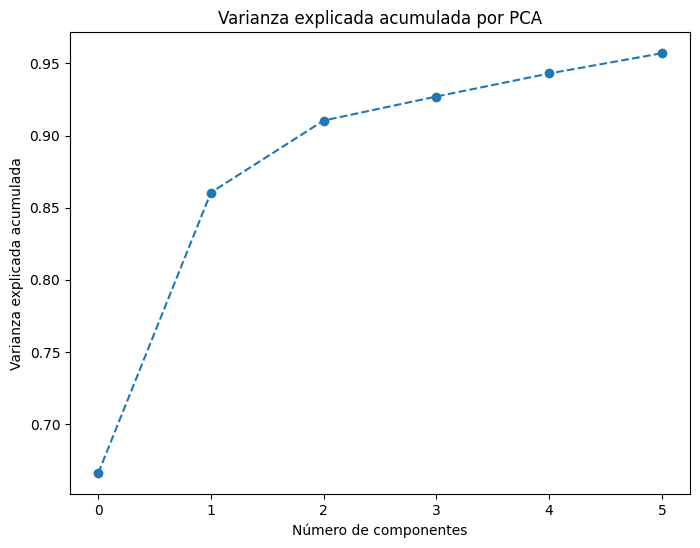

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = 'data/dataset_proyecto.csv'
data = pd.read_csv(dataset_path, sep='\t')

tamano_subconjunto = 20000
if len(data) > tamano_subconjunto:
    data = data.sample(n=tamano_subconjunto, random_state=42)

columnas_validas = data.columns[data.isnull().mean() < 0.5]
data_filtrado = data[columnas_validas].dropna()

columnas_categoricas = data_filtrado.select_dtypes(include=['object']).columns[:5]
data_procesada = pd.get_dummies(data_filtrado, columns=columnas_categoricas, drop_first=True)

columnas_preguntas = [col for col in data_procesada.columns if col.startswith('Q')]

X_base = data_procesada.drop(columns=columnas_preguntas)
importancias_preguntas = []

for pregunta in columnas_preguntas:
    try:
        y = data_procesada[pregunta]
        X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.3, random_state=42)
        modelo_rf = RandomForestClassifier(random_state=42, n_estimators=10)
        modelo_rf.fit(X_train, y_train)
        score = modelo_rf.score(X_test, y_test)
        importancias_preguntas.append((pregunta, score))
    except Exception as e:
        print(f"Error al procesar la pregunta {pregunta}: {e}")

pregunta_relevante = max(importancias_preguntas, key=lambda x: x[1])[0]
print(f"La pregunta más relevante identificada como objetivo es: {pregunta_relevante}")

y = data_procesada[pregunta_relevante]
X = data_procesada.drop(columns=[pregunta_relevante])

modelo_rf = RandomForestClassifier(random_state=42, n_estimators=10)
modelo_rf.fit(X, y)
importancias = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\nTop 10 características más importantes:")
print(importancias.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=importancias.head(10), hue='Característica', palette='viridis', dodge=False)
plt.title("Características más importantes según Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.legend([], [], frameon=False)
plt.show()


pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

print("\nForma de los datos después de aplicar PCA:", X_pca.shape)
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title("Varianza explicada acumulada por PCA")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.show()

La pregunta más relevante identificada como objetivo es: Q23A

Top 10 características más importantes:
   Característica  Importancia
2      testelapse     0.065286
3    surveyelapse     0.064409
24            age     0.054444
1     introelapse     0.053714
33     familysize     0.043725
29    orientation     0.027095
0          source     0.024844
20      education     0.023463
21          urban     0.022980
28       religion     0.019887


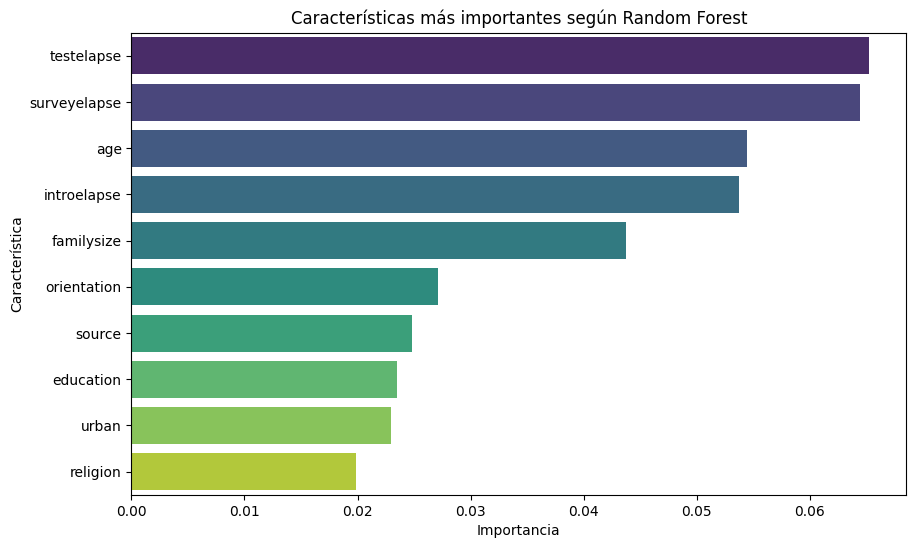

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = 'data/dataset_proyecto.csv'
data = pd.read_csv(dataset_path, sep='\t')

tamano_subconjunto = 10000
if len(data) > tamano_subconjunto:
    data = data.sample(n=tamano_subconjunto, random_state=42)

columnas_validas = data.columns[data.isnull().mean() < 0.5]
data_filtrado = data[columnas_validas].dropna()

columnas_categoricas = data_filtrado.select_dtypes(include=['object']).columns[:5]
data_procesada = pd.get_dummies(data_filtrado, columns=columnas_categoricas, drop_first=True)

columnas_preguntas = [col for col in data_procesada.columns if col.startswith('Q')]
columnas_excluir = [col for col in data_procesada.columns if col.startswith('Q') or col.startswith('TIPI')]

X_base = data_procesada.drop(columns=columnas_preguntas)
importancias_preguntas = []

for pregunta in columnas_preguntas:
    try:
        y = data_procesada[pregunta]
        X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.3, random_state=42)
        modelo_rf = RandomForestClassifier(random_state=42, n_estimators=10)
        modelo_rf.fit(X_train, y_train)
        score = modelo_rf.score(X_test, y_test)
        importancias_preguntas.append((pregunta, score))
    except Exception as e:
        print(f"Error al procesar la pregunta {pregunta}: {e}")

pregunta_relevante = max(importancias_preguntas, key=lambda x: x[1])[0]
print(f"La pregunta más relevante identificada como objetivo es: {pregunta_relevante}")

y = data_procesada[pregunta_relevante]
X = data_procesada.drop(columns=columnas_excluir)


modelo_rf = RandomForestClassifier(random_state=42, n_estimators=10)
modelo_rf.fit(X, y)
importancias = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\nTop 10 características más importantes:")
print(importancias.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=importancias.head(10), hue='Característica', palette='viridis', dodge=False)
plt.title("Características más importantes según Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.legend([], [], frameon=False)
plt.show()